<a href="https://colab.research.google.com/github/sivasaiyadav8143/Machine-Learning-with-Python/blob/master/LinearRegression_FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all required libraries

In [1]:
import pandas as pd, numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [69]:
# reading the CSV file into dataframe
car = pd.read_csv('car-mpg.csv')

# Check top few records to check the structure of the data
car.head(2)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320


In [70]:
# drop the car name since all the value are unique
car.drop(columns='car_name',axis=1,inplace=True)

In [71]:
# checking for NA's but not find any this is good 
car.isna().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
dtype: int64

In [72]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [73]:
# lets drive little more for NA's
# if we observe carefully at info(),column hp has 'object' as a datatype though it is a numeric.
# car[~(car.hp.str.isdigit())]
car.hp[~(car.hp.str.isdigit())] #it has '?' as null values

32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: hp, dtype: object

In [74]:
# replace '?' with NA so we can directly deal with NA's with inbuilt methods 
car.hp.replace('?',np.nan,inplace=True)
car.isna().sum()

mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
car_type    0
dtype: int64

In [75]:
# for now lets drop NA and change hp datatype to int
car.dropna(inplace=True)
car['hp'] = car['hp'].astype('float64')

In [76]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       392 non-null    float64
 1   cyl       392 non-null    int64  
 2   disp      392 non-null    float64
 3   hp        392 non-null    float64
 4   wt        392 non-null    int64  
 5   acc       392 non-null    float64
 6   yr        392 non-null    int64  
 7   origin    392 non-null    int64  
 8   car_type  392 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 30.6 KB


In [77]:
# perform descriptive analysis
car.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cyl,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
disp,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
wt,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acc,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
yr,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0
car_type,392.0,0.525510,0.499987,0.0,0.000,1.00,1.000,1.0


From above describe(), we could say
* disp, hp and wt columna are right skewed.Since there mean > median(50%)

In [78]:
# separare predictors and target
X = car.iloc[:,1:]
y = car.iloc[:,1]
X.shape,y.shape

((392, 8), (392,))

In [79]:
X.tail(5)

,cyl,disp,hp,wt,acc,yr,origin,car_type
393,4,140.0,86.0,2790,15.6,82,1,1
394,4,97.0,52.0,2130,24.6,82,2,1
395,4,135.0,84.0,2295,11.6,82,1,1
396,4,120.0,79.0,2625,18.6,82,1,1
397,4,119.0,82.0,2720,19.4,82,1,1


In [80]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=14)

In [59]:
# x_train.head()
# y_train.head()

In [81]:
# creating LinearRegression model
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
# train & test R^2
print(f"Train Score / R^2 : {regression.score(x_train,y_train)}")
print(f"Test Score / R^2 : {regression.score(x_test,y_test)}")

Train Score / R^2 : 1.0
Test Score / R^2 : 1.0


In [17]:
# Mean Squared Error for Train
train_pred = regression.predict(x_train)
mean_squared_error(y_train,train_pred)

1.1566025235563397e-28

In [18]:
# Mean Squared Error for Test
test_pred = regression.predict(x_test)
mean_squared_error(y_test,test_pred)

1.279458850387486e-28

We see some error in both train and test but R^2 is 100% in both train and test. This might be fluke/flash in the pan/sampling error i.e. the test set is perfect copy of train set. We may not see same results on another set.Lets confirm if this score is fluke with cross-validation.  

In [19]:
# Evaluate using Cross Validation
from sklearn import model_selection

In [20]:
lin_reg = LinearRegression()
kfold = model_selection.KFold(n_splits=20,random_state=14)
score = model_selection.cross_val_score(lin_reg,X,y,cv=10)
score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Lets make our model little complicated by adding more features with PolynomialFeatures

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly_train = poly.fit_transform(x_train)
poly_train[:2]

array([[1.0000000e+00, 6.0000000e+00, 1.9900000e+02, 9.0000000e+01,
        2.6480000e+03, 1.5000000e+01, 7.0000000e+01, 1.0000000e+00,
        0.0000000e+00, 3.6000000e+01, 1.1940000e+03, 5.4000000e+02,
        1.5888000e+04, 9.0000000e+01, 4.2000000e+02, 6.0000000e+00,
        0.0000000e+00, 3.9601000e+04, 1.7910000e+04, 5.2695200e+05,
        2.9850000e+03, 1.3930000e+04, 1.9900000e+02, 0.0000000e+00,
        8.1000000e+03, 2.3832000e+05, 1.3500000e+03, 6.3000000e+03,
        9.0000000e+01, 0.0000000e+00, 7.0119040e+06, 3.9720000e+04,
        1.8536000e+05, 2.6480000e+03, 0.0000000e+00, 2.2500000e+02,
        1.0500000e+03, 1.5000000e+01, 0.0000000e+00, 4.9000000e+03,
        7.0000000e+01, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [1.0000000e+00, 6.0000000e+00, 2.2500000e+02, 1.0000000e+02,
        3.6510000e+03, 1.7700000e+01, 7.6000000e+01, 1.0000000e+00,
        0.0000000e+00, 3.6000000e+01, 1.3500000e+03, 6.0000000e+02,
        2.1906000e+04, 1

In [27]:
regression.fit(poly_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
regression.score(poly_train,y_train)

1.0

In [30]:
poly = PolynomialFeatures(degree=3)
poly_train_ = poly.fit_transform(x_train)
poly_train_[2]

array([1.00000000e+00, 6.00000000e+00, 2.58000000e+02, 1.10000000e+02,
       3.63200000e+03, 1.80000000e+01, 7.40000000e+01, 1.00000000e+00,
       0.00000000e+00, 3.60000000e+01, 1.54800000e+03, 6.60000000e+02,
       2.17920000e+04, 1.08000000e+02, 4.44000000e+02, 6.00000000e+00,
       0.00000000e+00, 6.65640000e+04, 2.83800000e+04, 9.37056000e+05,
       4.64400000e+03, 1.90920000e+04, 2.58000000e+02, 0.00000000e+00,
       1.21000000e+04, 3.99520000e+05, 1.98000000e+03, 8.14000000e+03,
       1.10000000e+02, 0.00000000e+00, 1.31914240e+07, 6.53760000e+04,
       2.68768000e+05, 3.63200000e+03, 0.00000000e+00, 3.24000000e+02,
       1.33200000e+03, 1.80000000e+01, 0.00000000e+00, 5.47600000e+03,
       7.40000000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.16000000e+02, 9.28800000e+03, 3.96000000e+03,
       1.30752000e+05, 6.48000000e+02, 2.66400000e+03, 3.60000000e+01,
       0.00000000e+00, 3.99384000e+05, 1.70280000e+05, 5.62233600e+06,
      

In [31]:
regression.fit(poly_train,y_train)
regression.score(poly_train,y_train)

1.0

In [32]:
# Features selection
!pip install mlxtend

In [34]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [35]:
lr = LinearRegression()

# Build step forward feature selection
sfs1 = SequentialFeatureSelector(lr,k_features=5,forward=True)
sfs1 = sfs1.fit(x_train, y_train)

In [36]:
sfs1.subsets_

{1: {'avg_score': 1.0,
  'cv_scores': array([1., 1., 1., 1., 1.]),
  'feature_idx': (0,),
  'feature_names': ('cyl',)},
 2: {'avg_score': 1.0,
  'cv_scores': array([1., 1., 1., 1., 1.]),
  'feature_idx': (0, 1),
  'feature_names': ('cyl', 'disp')},
 3: {'avg_score': 1.0,
  'cv_scores': array([1., 1., 1., 1., 1.]),
  'feature_idx': (0, 1, 2),
  'feature_names': ('cyl', 'disp', 'hp')},
 4: {'avg_score': 1.0,
  'cv_scores': array([1., 1., 1., 1., 1.]),
  'feature_idx': (0, 1, 2, 3),
  'feature_names': ('cyl', 'disp', 'hp', 'wt')},
 5: {'avg_score': 1.0,
  'cv_scores': array([1., 1., 1., 1., 1.]),
  'feature_idx': (0, 1, 2, 3, 4),
  'feature_names': ('cyl', 'disp', 'hp', 'wt', 'acc')}}

In [38]:
# 5 best features
sfs1.k_feature_idx_

(0, 1, 2, 3, 4)

In [39]:
#  3 best features names
sfs1.k_feature_names_

('cyl', 'disp', 'hp', 'wt', 'acc')

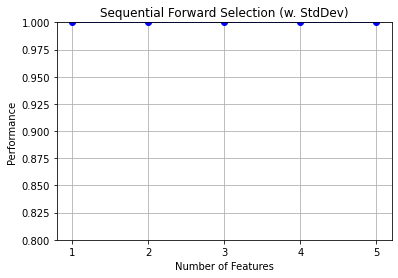

In [40]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [45]:
# Build full model with selected features
linR = LinearRegression()
linR.fit(x_train.iloc[:,list(sfs1.k_feature_idx_)], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
linR.score(x_train.iloc[:,list(sfs1.k_feature_idx_)], y_train)

1.0

In [47]:
linR.score(x_test.iloc[:,list(sfs1.k_feature_idx_)], y_test)

1.0